# Expressions EXPERT

Esta tabla contiene la información a nivel de expression. --> ABEL COMPLETAR <--

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *

TARGET_FEATURE = 'expression__expertise_level'
TARGET_CLASS = 'EXPERT'
full_table = get_data('expressions')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for EXPERT class.")

2024-05-28 17:06:29.466807 Data cache files found ...
2024-05-28 17:06:34.573408 Data cache files successfully loaded!!
The dataset contains 3490521 (42.14%) instances for BEGINNER class and 4792486 (57.86%) for EXPERT class.


In [2]:
full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name, features and target.
TABLE_NAME = 'expressions'
TABLE_FEATURES = ['expression__category','expression__parent','expression__first_child_category','expression__second_child_category','expression__third_child_category','expression__fourth_child_category','expression__expression_role','expression__height','expression__depth','expression__expertise_level']
TABLE_TARGET = 'expression__expertise_level'

# Load features and target.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. For each instance we have {X.shape[1]} attributes.')

Features shape: (4792486, 10)
As we can see the downloaded data contains a total of 4792486 instances. For each instance we have 10 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [3]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4792486 entries, 2958272 to 8283006
Data columns (total 10 columns):
 #   Column                             Dtype 
---  ------                             ----- 
 0   expression__category               object
 1   expression__parent                 object
 2   expression__first_child_category   object
 3   expression__second_child_category  object
 4   expression__third_child_category   object
 5   expression__fourth_child_category  object
 6   expression__expression_role        object
 7   expression__height                 int64 
 8   expression__depth                  int64 
 9   expression__expertise_level        object
dtypes: int64(2), object(8)
memory usage: 402.2+ MB
None


Cómo podemos ver la tabla está compuesta por 2 variables numéricas y 8 de tipo objeto (cetegoricas). 

### 2.2 - Duplicados
Miramos si la tabla tiene entradas duplicadas.

In [4]:
number_of_duplicated_entries = sum(full_table.duplicated(subset=TABLE_FEATURES))
duplicated_entries_pct = number_of_duplicated_entries / len(full_table) * 100
print(f"The dataset contains [{duplicated_entries_pct:.4}%] of duplicated entries.")

The dataset contains [97.8%] of duplicated entries.


### 2.3 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [5]:
X.isnull().sum()

expression__category                       0
expression__parent                         0
expression__first_child_category     2907705
expression__second_child_category    3964108
expression__third_child_category     4544484
expression__fourth_child_category    4698680
expression__expression_role                0
expression__height                         0
expression__depth                          0
expression__expertise_level                0
dtype: int64

Aunque una columna no contenga valores nulos podría ser que contenga valores vacíos. Si los hubiese la siguiente función los mostraría.

In [6]:
print_empty_cols(X)

expression__category
--------------------
0 instancias no tienen un valor para la columna expression__category


expression__parent
------------------
0 instancias no tienen un valor para la columna expression__parent


expression__first_child_category
--------------------------------
0 instancias no tienen un valor para la columna expression__first_child_category


expression__second_child_category
---------------------------------
0 instancias no tienen un valor para la columna expression__second_child_category


expression__third_child_category
--------------------------------
0 instancias no tienen un valor para la columna expression__third_child_category


expression__fourth_child_category
---------------------------------
0 instancias no tienen un valor para la columna expression__fourth_child_category


expression__expression_role
---------------------------
0 instancias no tienen un valor para la columna expression__expression_role


expression__height
------------------
0 inst

### 2.4 - Describimos los valores de las variables de la tabla.

In [7]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
expression__category,4792486,39,Variable,1694338,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expression__parent,4792486,49,Call,1219765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expression__first_child_category,1884781,37,Variable,904908,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expression__second_child_category,828378,36,Variable,273205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expression__third_child_category,248002,37,Variable,73816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expression__fourth_child_category,93806,33,Variable,25472,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expression__expression_role,4792486,79,CallArg,698097,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expression__height,4792486.0,NaN,NaN,NaN,5.209725,2.018426,1.0,4.0,5.0,6.0,58.0
expression__depth,4792486.0,NaN,NaN,NaN,0.669028,1.072528,0.0,0.0,0.0,1.0,27.0
expression__expertise_level,4792486,1,EXPERT,4792486,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesaario ver la distribucion de lo valores para hacer los bins (categorias). Revisar programa con 3k modulos y 1k paquetes.

In [8]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "expression__height": [(1, 3), (3, 4), (4, 5), (5, 6) ,(6, 7), (7, inf)],  # min: 1 max: 83
    "expression__depth": [(0, 1), (1, 2), (2, inf)],  # min: 1 max: 81
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['expression__category'], 10))
print(get_statistics(X_copy, ['expression__parent'], 10))
print(get_statistics(X_copy, ['expression__first_child_category'], 10))
print(get_statistics(X_copy, ['expression__second_child_category'], 10))
print(get_statistics(X_copy, ['expression__third_child_category'], 10))
print(get_statistics(X_copy, ['expression__fourth_child_category'], 10))
print(get_statistics(X_copy, ['expression__expression_role'], 10))
print(get_statistics(X_copy, ['expression__height'], 10))
print(get_statistics(X_copy, ['expression__depth'], 10))

# 2 FEATURES
print("--- TWO FEATURES ---")
print(get_statistics(X_copy, ['expression__category', 'expression__expression_role'], 10))
print(get_statistics(X_copy, ['expression__category', 'expression__parent'], 10))
print(get_statistics(X_copy, ['expression__parent', 'expression__expression_role'], 10))


# 3 FEATURES
print("--- THREE FEATURES ---")
print(get_statistics(X_copy, ['expression__category', 'expression__first_child_category', 'expression__second_child_category'], 10))


--- SINGLE FEATURE ---
expression__category   count  percentage
            Variable 1694338   35.354052
       StringLiteral  684034   14.273052
                 Dot  653564   13.637265
                Call  521668   10.885123
          IntLiteral  278253    5.806026
        FloatLiteral  147929    3.086686
        TupleLiteral  146517    3.057223
     UnaryArithmetic  140111    2.923556
            Indexing  102635    2.141582
             Compare   87885    1.833808

expression__parent   count  percentage
              Call 1219765   25.451613
               Dot  653564   13.637265
    AssignmentStmt  566555   11.821735
      TupleLiteral  451636    9.423836
 DictionaryLiteral  395411    8.250645
          Indexing  205270    4.283163
           Compare  176258    3.677799
   UnaryArithmetic  140111    2.923556
       FunctionDef  136894    2.856430
       ListLiteral  112009    2.337179

expression__first_child_category  count  percentage
                        Variable 904908   1

In [9]:
def normalize_datatypes(X:pd.DataFrame) -> (pd.DataFrame, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')        
    columns_names = X.columns.tolist()
    return X, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

Features shape: (4792486, 313)


#### Muestra la matriz de correlación de pearson entre las variables de la tabla.

In [10]:
# Con estos datos (8102385, 316) la matriz de confusion es demasiado grande.
# sns.heatmap(X.corr(), annot=True)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 9 variable (2 numericas y 7 categoricas) se hara un analisis detallado

### Variable category (1/9)
Esta variable es de tipo categorica y representa la categoria de la expresion.

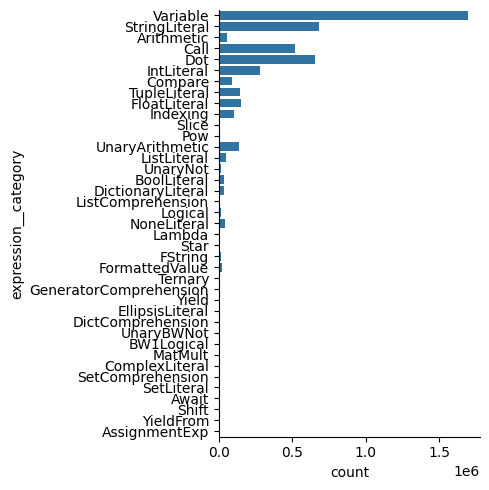

In [11]:
sns.catplot(full_table['expression__category'], kind="count")

In [12]:
possible_values = ['Variable','StringLiteral','IntLiteral','Dot','Call','TupleLiteral','Indexing','Compare','FloatLiteral','UnaryArithmetic','Arithmetic','ListLiteral','NoneLiteral','BoolLiteral','DictionaryLiteral','Logical','FormattedValue','UnaryNot','FString','Slice','ListComprehension','Ternary','Lambda','Yield','ComplexLiteral','GeneratorComprehension','BW1Logical','Star','Await','Pow','SetLiteral','DictComprehension','EllipsisLiteral','Shift','SetComprehension','YieldFrom','UnaryBWNot','MatMult','AssignmentExp']
print_frequency_anal_for_cat_var(full_table, 'expression__category', possible_values)

La variable expression__category contiene 39 valores distintos.
El umbral de outlier es de 0.005128205128205128%
La variable expression__category toma el valor de Variable en un 35.35% de los items.
La variable expression__category toma el valor de StringLiteral en un 14.27% de los items.
La variable expression__category toma el valor de Dot en un 13.64% de los items.
La variable expression__category toma el valor de Call en un 10.89% de los items.
La variable expression__category toma el valor de IntLiteral en un 5.806% de los items.
La variable expression__category toma el valor de FloatLiteral en un 3.087% de los items.
La variable expression__category toma el valor de TupleLiteral en un 3.057% de los items.
La variable expression__category toma el valor de UnaryArithmetic en un 2.924% de los items.
La variable expression__category toma el valor de Indexing en un 2.142% de los items.
La variable expression__category toma el valor de Compare en un 1.834% de los items.
La variable exp

### Variable parent (2/9)
Esta variable es de tipo categorica y representa la categoria del padre de la expresion.

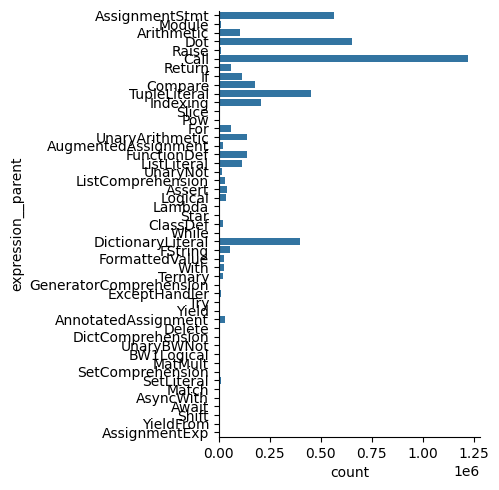

In [13]:
sns.catplot(full_table['expression__parent'], kind="count")

In [14]:
possible_values = ['Call','Dot','AssignmentStmt','TupleLiteral','DictionaryLiteral','Indexing','Compare','If','Arithmetic','ListLiteral','FunctionDef','UnaryArithmetic','For','Return','Logical','FString','Assert','AugmentedAssignment','ListComprehension','AnnotatedAssignment','ClassDef','With','FormattedValue','UnaryNot','Ternary','Raise','ExceptHandler','Module','While','GeneratorComprehension','Slice','SetLiteral','BW1Logical','Try','DictComprehension','Lambda','Yield','Star','Await','Pow','Delete','Shift','SetComprehension','YieldFrom','MatMult','UnaryBWNot','AsyncWith','Match','AssignmentExp']
print_frequency_anal_for_cat_var(full_table, 'expression__parent', possible_values)

La variable expression__parent contiene 49 valores distintos.
El umbral de outlier es de 0.004081632653061225%
La variable expression__parent toma el valor de Call en un 25.45% de los items.
La variable expression__parent toma el valor de Dot en un 13.64% de los items.
La variable expression__parent toma el valor de AssignmentStmt en un 11.82% de los items.
La variable expression__parent toma el valor de TupleLiteral en un 9.424% de los items.
La variable expression__parent toma el valor de DictionaryLiteral en un 8.251% de los items.
La variable expression__parent toma el valor de Indexing en un 4.283% de los items.
La variable expression__parent toma el valor de Compare en un 3.678% de los items.
La variable expression__parent toma el valor de UnaryArithmetic en un 2.924% de los items.
La variable expression__parent toma el valor de FunctionDef en un 2.856% de los items.
La variable expression__parent toma el valor de ListLiteral en un 2.337% de los items.
La variable expression__par

### Variable first_child_category (3/9)
Esta variable es de tipo categorica y representa la categoria del primer hijo de la expresion.

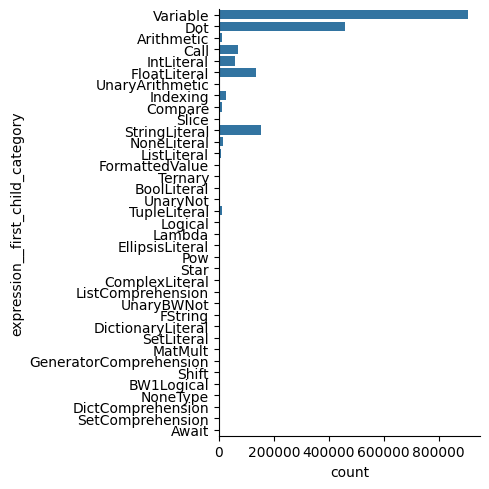

In [15]:
sns.catplot(full_table['expression__first_child_category'], kind="count")

In [16]:
possible_values = ['Variable','Dot','StringLiteral','IntLiteral','FloatLiteral','Call','Indexing','NoneLiteral','Arithmetic','Compare','TupleLiteral','ListLiteral','FormattedValue','BoolLiteral','UnaryArithmetic','UnaryNot','DictionaryLiteral','Logical','ComplexLiteral','Slice','BW1Logical','FString','SetLiteral','Ternary','Pow','ListComprehension','EllipsisLiteral','Shift','NoneType','Star','UnaryBWNot','Await','MatMult','GeneratorComprehension','Lambda','DictComprehension','SetComprehension','AssignmentExp']
print_frequency_anal_for_cat_var(full_table, 'expression__first_child_category', possible_values)

La variable expression__first_child_category contiene 39 valores distintos.
El umbral de outlier es de 0.005128205128205128%
La variable expression__first_child_category toma el valor de Variable en un 18.88% de los items.
La variable expression__first_child_category toma el valor de Dot en un 9.588% de los items.
La variable expression__first_child_category toma el valor de StringLiteral en un 3.198% de los items.
La variable expression__first_child_category toma el valor de FloatLiteral en un 2.795% de los items.
La variable expression__first_child_category toma el valor de Call en un 1.452% de los items.
La variable expression__first_child_category toma el valor de IntLiteral en un 1.233% de los items.
La variable expression__first_child_category toma el valor de Indexing en un 0.5667% de los items.
La variable expression__first_child_category toma el valor de NoneLiteral en un 0.3226% de los items.
La variable expression__first_child_category toma el valor de Arithmetic en un 0.259

### Variable second_child_category (4/9)
Esta variable es de tipo categorica y representa la categoria del segundo hijo de la expresion.

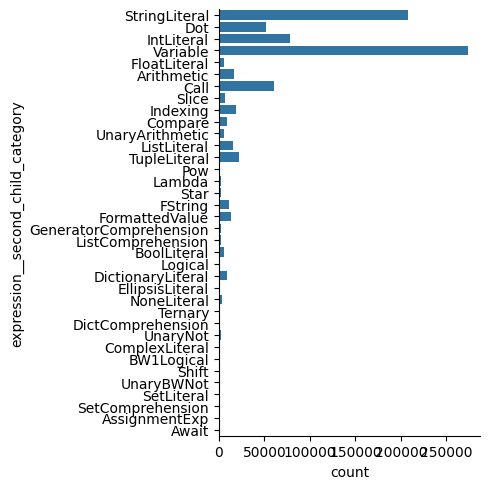

In [17]:
sns.catplot(full_table['expression__second_child_category'], kind="count")

In [18]:
possible_values = ['Variable','StringLiteral','IntLiteral','Call','Dot','Arithmetic','Indexing','TupleLiteral','Compare','ListLiteral','FormattedValue','FString','Slice','DictionaryLiteral','UnaryArithmetic','BoolLiteral','FloatLiteral','NoneLiteral','GeneratorComprehension','UnaryNot','Lambda','Star','ListComprehension','Logical','ComplexLiteral','BW1Logical','Ternary','Pow','EllipsisLiteral','SetLiteral','UnaryBWNot','DictComprehension','Shift','SetComprehension','Await','AssignmentExp']
print_frequency_anal_for_cat_var(full_table, 'expression__second_child_category', possible_values)

La variable expression__second_child_category contiene 37 valores distintos.
El umbral de outlier es de 0.005405405405405406%
La variable expression__second_child_category toma el valor de Variable en un 5.701% de los items.
La variable expression__second_child_category toma el valor de StringLiteral en un 4.336% de los items.
La variable expression__second_child_category toma el valor de IntLiteral en un 1.633% de los items.
La variable expression__second_child_category toma el valor de Call en un 1.261% de los items.
La variable expression__second_child_category toma el valor de Dot en un 1.085% de los items.
La variable expression__second_child_category toma el valor de TupleLiteral en un 0.4683% de los items.
La variable expression__second_child_category toma el valor de Indexing en un 0.389% de los items.
La variable expression__second_child_category toma el valor de Arithmetic en un 0.3346% de los items.
La variable expression__second_child_category toma el valor de ListLiteral e

### Variable third_child_category (5/9)
Esta variable es de tipo categorica y representa la categoria del tercer hijo de la expresion.

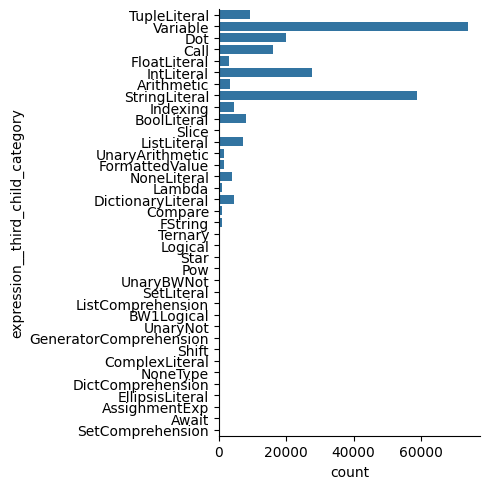

In [19]:
sns.catplot(full_table['expression__third_child_category'], kind="count")

In [20]:
possible_values = ['StringLiteral','Variable','IntLiteral','Dot','Call','TupleLiteral','BoolLiteral','ListLiteral','Arithmetic','Indexing','DictionaryLiteral','NoneLiteral','FloatLiteral','Compare','FormattedValue','UnaryArithmetic','Lambda','FString','Star','Logical','UnaryNot','Ternary','Slice','ComplexLiteral','NoneType','BW1Logical','ListComprehension','SetLiteral','Pow','GeneratorComprehension','DictComprehension','Await','EllipsisLiteral','Shift','AssignmentExp','UnaryBWNot','SetComprehension']
print_frequency_anal_for_cat_var(full_table, 'expression__third_child_category', possible_values)

La variable expression__third_child_category contiene 38 valores distintos.
El umbral de outlier es de 0.005263157894736842%
La variable expression__third_child_category toma el valor de Variable en un 1.54% de los items.
La variable expression__third_child_category toma el valor de StringLiteral en un 1.226% de los items.
La variable expression__third_child_category toma el valor de IntLiteral en un 0.5736% de los items.
La variable expression__third_child_category toma el valor de Dot en un 0.413% de los items.
La variable expression__third_child_category toma el valor de Call en un 0.3374% de los items.
La variable expression__third_child_category toma el valor de TupleLiteral en un 0.193% de los items.
La variable expression__third_child_category toma el valor de BoolLiteral en un 0.168% de los items.
La variable expression__third_child_category toma el valor de ListLiteral en un 0.1474% de los items.
La variable expression__third_child_category toma el valor de Indexing en un 0.09

### Variable fourth_child_category (6/9)
Esta variable es de tipo categorica y representa la categoria del cuarto hijo de la expresion.

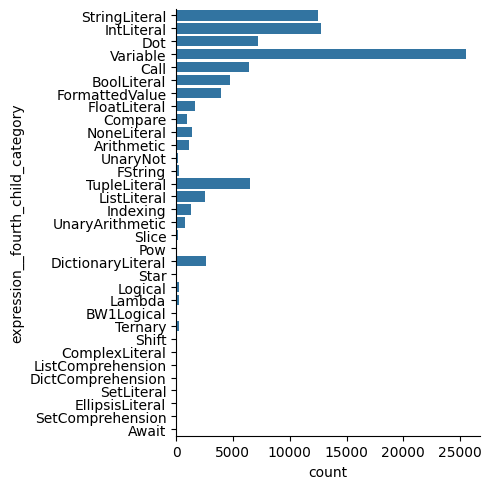

In [21]:
sns.catplot(full_table['expression__fourth_child_category'], kind="count")

In [22]:
possible_values = ['Variable','StringLiteral','IntLiteral','Dot','Call','TupleLiteral','BoolLiteral','FormattedValue','ListLiteral','DictionaryLiteral','NoneLiteral','Compare','Indexing','FloatLiteral','Arithmetic','UnaryArithmetic','Logical','UnaryNot','FString','Lambda','Ternary','Star','Slice','ComplexLiteral','ListComprehension','SetLiteral','Pow','BW1Logical','DictComprehension','GeneratorComprehension','Shift','EllipsisLiteral','SetComprehension','Await','None']
print_frequency_anal_for_cat_var(full_table, 'expression__fourth_child_category', possible_values)

La variable expression__fourth_child_category contiene 36 valores distintos.
El umbral de outlier es de 0.005555555555555556%
La variable expression__fourth_child_category toma el valor de Variable en un 0.5315% de los items.
La variable expression__fourth_child_category toma el valor de IntLiteral en un 0.2664% de los items.
La variable expression__fourth_child_category toma el valor de StringLiteral en un 0.2601% de los items.
La variable expression__fourth_child_category toma el valor de Dot en un 0.1504% de los items.
La variable expression__fourth_child_category toma el valor de TupleLiteral en un 0.135% de los items.
La variable expression__fourth_child_category toma el valor de Call en un 0.1336% de los items.
La variable expression__fourth_child_category toma el valor de BoolLiteral en un 0.09851% de los items.
La variable expression__fourth_child_category toma el valor de FormattedValue en un 0.08269% de los items.
La variable expression__fourth_child_category toma el valor de

### Variable expression_role (7/9)
Esta variable es de tipo categorica y representa el rol de la expresion en su padre.

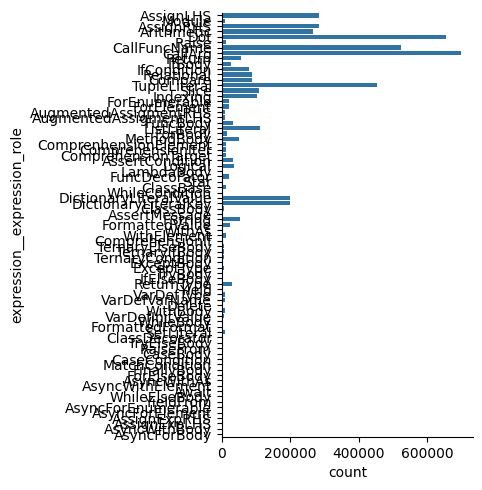

In [23]:
sns.catplot(full_table['expression__expression_role'], kind="count")

In [24]:
possible_values = ['CallArg','Dot','TupleLiteral','CallFuncName','AssignLHS','AssignRHS','DictionaryLiteralValue','DictionaryLiteralKey','Arithmetic','ListLiteral','Slice','Indexing','Relational','Compare','IfCondition','Return','Logical','MethodBody','FString','IfBody','FuncBody','ForElement','ForEnumerable','ReturnType','AssertCondition','FormattedValue','FuncDecorator','ForBody','Raise','AugmentedAssigmentLHS','AugmentedAssigmentRHS','ClassBase','ComprehensionTarget','ComprehensionIter','Module','ComprenhensionElement','ExceptType','WithElement','VarDefType','VarDefVarName','IfElseBody','ClassBody','WithBody','SetLiteral','VarDefInitValue','WhileCondition','TernaryElseBody','TernaryIfBody','TernaryCondition','WithAs','TryBody','WhileBody','LambdaBody','Yield','ExceptBody','Star','Await','AssertMessage','ClassDecorator','ComprehensionIf','Delete','FinallyBody','FormattedFormat','RaiseFrom','YieldFrom','TryElseBody','AsyncForElement','AsyncForEnumerable','AsyncWithElement','AsyncForBody','CaseCondition','AsyncWithAs','ForElseBody','AssignExpRHS','AssignExpLHS','AsyncWithBody','MatchCondition','WhileElseBody','CaseBody']
print_frequency_anal_for_cat_var(full_table, 'expression__expression_role', possible_values)

La variable expression__expression_role contiene 79 valores distintos.
El umbral de outlier es de 0.002531645569620253%
La variable expression__expression_role toma el valor de CallArg en un 14.57% de los items.
La variable expression__expression_role toma el valor de Dot en un 13.64% de los items.
La variable expression__expression_role toma el valor de CallFuncName en un 10.89% de los items.
La variable expression__expression_role toma el valor de TupleLiteral en un 9.424% de los items.
La variable expression__expression_role toma el valor de AssignLHS en un 5.915% de los items.
La variable expression__expression_role toma el valor de AssignRHS en un 5.906% de los items.
La variable expression__expression_role toma el valor de Arithmetic en un 5.565% de los items.
La variable expression__expression_role toma el valor de DictionaryLiteralValue en un 4.158% de los items.
La variable expression__expression_role toma el valor de DictionaryLiteralKey en un 4.142% de los items.
La variable

### Variable height (8/9)
Esta variable representa la distancia de la expresión al root del módulo (fichero). Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 58. Con una media de 5.20.

<Axes: ylabel='expression__height'>

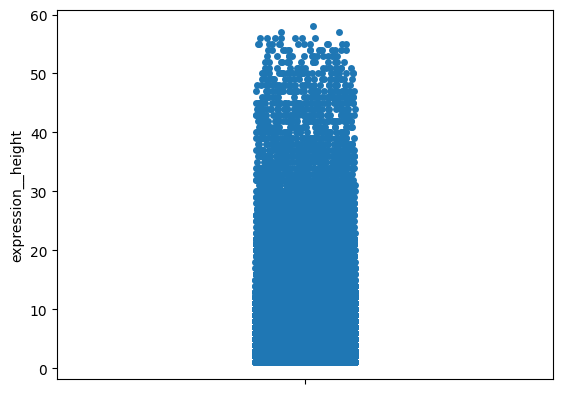

In [25]:
sns.stripplot(X['expression__height'])

In [26]:
print_outliers_for_df_column(X, 'expression__height')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8231229029203716
Rango valores atípicos extremos (Tukey): [-2.0,12.0]
Rango valores atípicos leves (Tukey): [1.0,9.0]
Rango valores atípicos extremos (Fixed BoxPlot): [3.831752281638913,86.7294871193111]
-3.0IQR: 0 instancias tienen un valor para expression__height inferior a -2.0 (Q1-3*IQR) para expression__height. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para expression__height inferior a 1.0 (Q1-1.5*IQR) para expression__height. Representando un 0.0% del total de instancias.
+1.5IQR: 136147 instancias tienen un valor para expression__height superior a 9.0 (Q3+1.5*IQR) para expression__height. Representando un 2.841% del total de instancias.
+3.0IQR: 27154 instancias tienen un valor para expression__height superior a 12.0 (Q3-3*IQR) para expression__height. Representando un 0.5666% del total de instancias.
L: 699796 instancias tienen un valor para expression__height inferior a 3.83

In [27]:
X[X['expression__height'] > 12].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,expression__height,expression__depth,expression__category_Arithmetic,expression__category_AssignmentExp,expression__category_Await,expression__category_BW1Logical,expression__category_BoolLiteral,expression__category_Call,expression__category_Compare,expression__category_ComplexLiteral,...,expression__expression_role_VarDefVarName,expression__expression_role_WhileBody,expression__expression_role_WhileCondition,expression__expression_role_WhileElseBody,expression__expression_role_WithAs,expression__expression_role_WithBody,expression__expression_role_WithElement,expression__expression_role_Yield,expression__expression_role_YieldFrom,expression__expertise_level_EXPERT
count,27154.000000,27154.000000,27154.000000,27154.000000,27154.0,27154.000000,27154.000000,27154.000000,27154.000000,27154.000000,...,27154.0,27154.0,27154.0,27154.0,27154.0,27154.000000,27154.000000,27154.000000,27154.0,27154.0
mean,16.699198,0.657435,0.024711,0.000037,0.0,0.000295,0.007697,0.091515,0.021544,0.000737,...,0.0,0.0,0.0,0.0,0.0,0.000037,0.000110,0.000442,0.0,1.0
std,6.130846,1.159244,0.155246,0.006069,0.0,0.017162,0.087395,0.288345,0.145191,0.027130,...,0.0,0.0,0.0,0.0,0.0,0.006069,0.010511,0.021018,0.0,0.0
min,13.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.0
25%,13.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.0
50%,14.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.0
75%,17.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.0
max,58.000000,16.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.0,1.0


### Variable depth (9/9)
Esta variable representa la distancia desde la expresion hasta una hoja del ast. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 27. Con una media de 0.66.

<Axes: ylabel='expression__depth'>

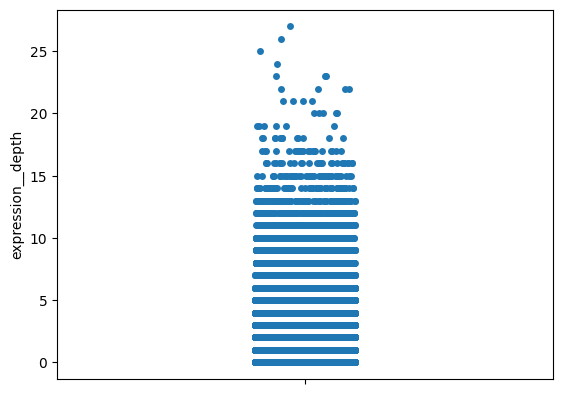

In [28]:
sns.stripplot(X['expression__depth'])

In [29]:
print_outliers_for_df_column(X, 'expression__depth')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.5589657545398315
Rango valores atípicos extremos (Tukey): [-3.0,4.0]
Rango valores atípicos leves (Tukey): [-1.5,2.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.2120538488018641,15.031827276090755]
-3.0IQR: 0 instancias tienen un valor para expression__depth inferior a -3.0 (Q1-3*IQR) para expression__depth. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para expression__depth inferior a -1.5 (Q1-1.5*IQR) para expression__depth. Representando un 0.0% del total de instancias.
+1.5IQR: 322374 instancias tienen un valor para expression__depth superior a 2.5 (Q3+1.5*IQR) para expression__depth. Representando un 6.727% del total de instancias.
+3.0IQR: 48467 instancias tienen un valor para expression__depth superior a 4.0 (Q3-3*IQR) para expression__depth. Representando un 1.011% del total de instancias.
L: 0 instancias tienen un valor para expression__depth inferior a -0.212053848801

In [30]:
X[X['expression__depth'] > 4].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,expression__height,expression__depth,expression__category_Arithmetic,expression__category_AssignmentExp,expression__category_Await,expression__category_BW1Logical,expression__category_BoolLiteral,expression__category_Call,expression__category_Compare,expression__category_ComplexLiteral,...,expression__expression_role_VarDefVarName,expression__expression_role_WhileBody,expression__expression_role_WhileCondition,expression__expression_role_WhileElseBody,expression__expression_role_WithAs,expression__expression_role_WithBody,expression__expression_role_WithElement,expression__expression_role_Yield,expression__expression_role_YieldFrom,expression__expertise_level_EXPERT
count,48467.000000,48467.000000,48467.000000,48467.000000,48467.000000,48467.000000,48467.0,48467.000000,48467.000000,48467.0,...,48467.0,48467.00000,48467.000000,48467.000000,48467.0,48467.000000,48467.000000,48467.000000,48467.0,48467.0
mean,4.786845,5.748365,0.074195,0.000021,0.006850,0.003012,0.0,0.507314,0.069284,0.0,...,0.0,0.00130,0.002125,0.000021,0.0,0.008088,0.001527,0.001341,0.0,1.0
std,2.151011,1.363836,0.262090,0.004542,0.082482,0.054803,0.0,0.499952,0.253940,0.0,...,0.0,0.03603,0.046051,0.004542,0.0,0.089570,0.039045,0.036597,0.0,0.0
min,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.0
25%,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.0
50%,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0,...,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.0
75%,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0,...,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.0
max,50.000000,27.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,...,0.0,1.00000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.0


## Multivariate

TODO: isolation forest algorithm

In [31]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,expression__expression_id,expression__category,expression__parent,expression__first_child_category,expression__second_child_category,expression__third_child_category,expression__fourth_child_category,expression__expression_role,expression__height,expression__depth,expression__expertise_level
3490968,4092882,Call,Return,Variable,Variable,Variable,Variable,Return,3,1,EXPERT
3491562,4092183,TupleLiteral,Return,Variable,Variable,Variable,None,Return,3,1,EXPERT
3492995,4090486,TupleLiteral,Return,Variable,Variable,Variable,None,Return,4,1,EXPERT
3493085,4090384,TupleLiteral,Return,Variable,Variable,Variable,Variable,Return,4,1,EXPERT
3495268,4087775,Call,Return,Dot,Variable,Variable,Variable,Return,5,2,EXPERT
...,...,...,...,...,...,...,...,...,...,...,...
8281535,9208727,ListLiteral,Return,StringLiteral,StringLiteral,StringLiteral,Variable,Return,4,1,EXPERT
8281584,9208669,ListLiteral,Return,StringLiteral,StringLiteral,StringLiteral,StringLiteral,Return,4,1,EXPERT
8281689,9208535,Ternary,Return,Call,StringLiteral,StringLiteral,None,Return,4,4,EXPERT
8281937,9208212,Ternary,Return,Call,StringLiteral,StringLiteral,None,Return,4,4,EXPERT
